In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, math

In [ ]:
def perspective2(image):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255

    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))]
    if len(rects)
    for rect in rects:
        box = cv2.boxPoints(rect)
        box = box.astype('int')
#         img2 = cv2.drawContours(img, [box], -1, (0, 0, 255), 5)
        
    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp #, temp_rect

In [5]:
tresh_min = 100
tresh_max = 255

image = cv2.imread('../big_au/sample2/C10_0_5434.jpg')
im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 모서리를 찾는 작업
rects = [cv2.minAreaRect(each) for each in contours]
rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))]
for rect in rects:
    box = cv2.boxPoints(rect)
    box = box.astype('int')

In [7]:
len(rects)

1

In [ ]:
image = cv2.imread(file_name)

In [17]:
def preprocess_perspective(file_name):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255

    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))] # 값 9000은 추후 수정 필요
    if len(rects)>1:
        return "too many cards" # 사각형을 여러개 찾았으니 error 표시
    
    box = cv2.boxPoints(rect)
    
    box = box[np.argsort(box[:, 1])]
    if box[0][0]>box[1][0]:
        temp = box[0].copy()
        box[0] = box[1]
        box[1] = temp
    if box[2][0]<box[3][0]:
        temp = box[2].copy()
        box[2] = box[3]
        box[3] = temp
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(box,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp #, temp_rect

In [24]:
preprocess_perspective2('../big_au/sample2/C10_0_5434.jpg')

array([[  0,  42,  38, ...,  46,  43,  60],
       [ 14, 156, 195, ..., 178, 172, 212],
       [  0, 112, 191, ..., 236, 226, 190],
       ...,
       [ 60, 195, 252, ...,   6,   3,   0],
       [ 55, 192, 246, ...,   0,   0,   0],
       [ 70, 201, 206, ...,   0,   0,   0]], dtype=uint8)

In [21]:
preprocess_perspective('../big_au/sample2/C10_0_5434.jpg')

array([[ 76,  92,  89, ...,  83, 101,  53],
       [134, 189, 212, ..., 193, 200, 108],
       [103, 196, 237, ..., 237, 203,  86],
       ...,
       [ 86, 204, 248, ...,   0,   0,   0],
       [ 94, 204, 214, ...,   0,   0,   0],
       [ 94, 178, 146, ...,   0,   0,   0]], dtype=uint8)

In [35]:
a = preprocess_perspective('../big_au/sample2/C10_0_5434.jpg')
b = preprocess_perspective2('../big_au/sample2/C10_0_5434.jpg')

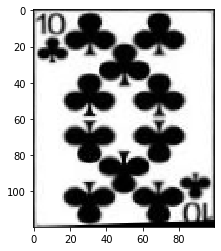

In [36]:
plt.imshow(a,cmap="gray")

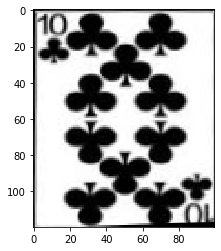

In [37]:
plt.imshow(b, cmap='gray')

In [38]:
cv2.absdiff(a,b).sum()

225791

In [22]:
def preprocess_perspective2(file_name):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255

    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))] # 값 9000은 추후 수정 필요
    if len(rects)>1:
        return "too many boundary" # card boundary(사각형)를 여러개 찾았으니 error 표시
    
    box = cv2.boxPoints(rects[0])
    box = box.astype('int')
        
    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp #, temp_rect

In [14]:
box = cv2.boxPoints(rects[0])

In [15]:
box

array([[139.92172 , 172.95686 ],
       [ 40.161343, 168.96645 ],
       [ 44.94568 ,  49.357834],
       [144.70605 ,  53.34825 ]], dtype=float32)

In [41]:
box

array([[139.92172 , 172.95686 ],
       [ 40.161343, 168.96645 ],
       [ 44.94568 ,  49.357834],
       [144.70605 ,  53.34825 ]], dtype=float32)

In [42]:
box1 = box.astype('int')
np.array(box1, dtype = "float32")

array([[139., 172.],
       [ 40., 168.],
       [ 44.,  49.],
       [144.,  53.]], dtype=float32)

In [16]:
temp_rect

NameError: name 'temp_rect' is not defined

In [47]:
cardlist=[]
ori_card_dir = os.listdir('./test/origin_card')
for i in ori_card_dir:
    cardlist.append(i[:-4])
    
cards = np.zeros((len(ori_card_dir), 120, 100))
n=0
for i in origin_card:
    tmpimg = cv2.imread('./test/origin_card/'+i, cv2.IMREAD_GRAYSCALE)
    cards[n]=tmpimg
    n+=1

In [74]:
file_name = '../big_au/sample2/C10_0_5434.jpg'
warp_img = preprocess_perspective(file_name)
shape_num = find_shape_num(warp_img)
print(shape_num)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:687: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'cv::arithm_op'


In [81]:
cardlist, cards = origin_card_info()

threshold = 200000

min_img = threshold + 50000
min_num = 0

for i in range(len(cardlist)):
    diff_img = cv2.absdiff(cards[i],a)
    diff_img = diff_img.sum()
    if diff_img<min_img:
        min_img=diff_img
        min_num=i

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:687: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'cv::arithm_op'


In [79]:
cards[0].shape

(120, 100)

In [85]:
cards[0]

array([[255., 189., 160., ..., 157., 190., 254.],
       [177., 194., 252., ..., 255., 194., 179.],
       [144., 255., 255., ..., 251., 254., 148.],
       ...,
       [149., 255., 251., ..., 249., 255., 147.],
       [177., 194., 255., ..., 254., 194., 176.],
       [255., 191., 159., ..., 158., 190., 254.]])

In [83]:
a

array([[ 76,  92,  89, ...,  83, 101,  53],
       [134, 189, 212, ..., 193, 200, 108],
       [103, 196, 237, ..., 237, 203,  86],
       ...,
       [ 86, 204, 248, ...,   0,   0,   0],
       [ 94, 204, 214, ...,   0,   0,   0],
       [ 94, 178, 146, ...,   0,   0,   0]], dtype=uint8)

In [80]:
a.shape

(120, 100)

In [ ]:
diff_img = cv2.absdiff(cards[card], warp)

In [86]:
cards = []
for i in os.listdir('../dataset/card_deck1'):
#     print(i)
    cards.append(cv2.imread('../dataset/card_deck1/'+i, cv2.IMREAD_GRAYSCALE))
cards = np.array(cards)


In [88]:
cards.dtype

dtype('uint8')

In [89]:
a.dtype

dtype('uint8')

In [123]:
def preprocess_perspective(file_name):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255

    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))] # 값 9000은 추후 수정 필요
    if len(rects)>1:
        return "too many boundary" # card boundary(사각형)를 여러개 찾았으니 error 표시
    
    box = cv2.boxPoints(rects[0])
    box = box.astype('int')
        
    temp_rect = np.array(box, dtype = "float32")
    temp_rect = temp_rect[np.argsort(temp_rect[:, 1])]
    if temp_rect[0][0]>temp_rect[1][0]:
        temp = temp_rect[0].copy()
        temp_rect[0] = temp_rect[1]
        temp_rect[1] = temp
    if temp_rect[2][0]<temp_rect[3][0]:
        temp = temp_rect[2].copy()
        temp_rect[2] = temp_rect[3]
        temp_rect[3] = temp
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp #, temp_rect

def preprocess_perspective_simple(file_name):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255

    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))] # 값 9000은 추후 수정 필요
    if len(rects)>1:
        return "too many cards" # 사각형을 여러개 찾았으니 error 표시
    
    box = cv2.boxPoints(rect)
    
    box = box[np.argsort(box[:, 1])]
    if box[0][0]>box[1][0]:
        temp = box[0].copy()
        box[0] = box[1]
        box[1] = temp
    if box[2][0]<box[3][0]:
        temp = box[2].copy()
        box[2] = box[3]
        box[3] = temp
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(box,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp #, temp_rect

def origin_card_info():
    cardlist=[]
    origin_card = os.listdir('./test/origin_card')

    for i in origin_card:
        cardlist.append(i[:-4])
    
    

    cards = []
    for i in origin_card:
    #     print(i)
        cards.append(cv2.imread('./test/origin_card/'+i, cv2.IMREAD_GRAYSCALE))
    cards = np.array(cards)

    return cardlist, cards

def shape_num(warp_image):
    cardlist, cards = origin_card_info()

    threshold = 2000000

    min_img = threshold + 50000
    min_num = 0

    for i in range(len(cardlist)):
        diff_img = cv2.absdiff(cards[i],warp_image).sum()
        if diff_img<min_img:
            min_img=diff_img
            min_num=i
    if min_img>=threshold:
        return "can't classify card"
    
    return cardlist[min_num]


In [124]:
file_name = '../big_au/sample2/C10_0_5434.jpg'
warp_img = preprocess_perspective2(file_name)
shape_num = find_shape_num(warp_img)

In [125]:
shape_num

"can't classify card"

In [111]:
cardlist, cards = origin_card_info()

threshold = 2000000

min_img = threshold + 50000
min_num = 0

for i in range(len(cardlist)):
    diff_img = cv2.absdiff(cards[i],warp_img).sum()
    print(diff_img)
    if diff_img<min_img:
        min_img=diff_img
        min_num=i

300926
985702
1151656
1171745
1241797
1150843
927149
924053
392621
1073546
1109557
1117547
1099249
725982
1053996
1129040
1171504
1216235
1151935
1168122
1189468
776582
1145662
1140800
1147922
1137855
817365
1059927
1082915
1174160
1212224
1024532
956084
931371
854707
1098009
1072508
1116718
1073559
476942
991757
1133166
1192961
1242366
1196108
1177945
1195979
550568
1071877
1117837
1101820
1126403


In [112]:
min_img

300926

In [113]:
min_num

0